In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
# dataset
digits = pd.read_csv("train.csv")

In [3]:
# about the dataset

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [4]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
order = list(np.sort(digits['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# aggregating mean grouped by label

digit_means = digits.groupby('label').mean()
digit_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


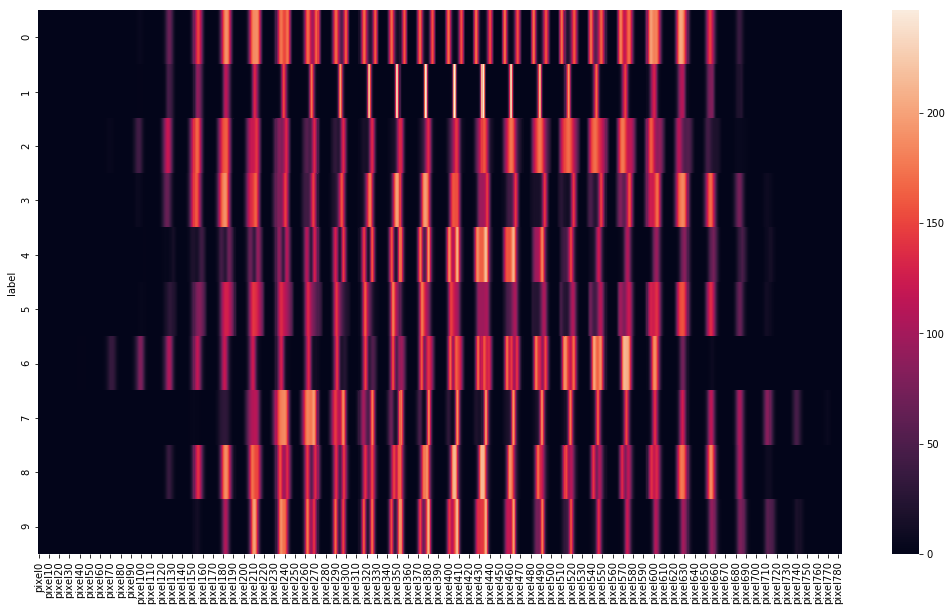

In [7]:
# plotting pixel mean

plt.figure(figsize=(18, 10))
sns.heatmap(digit_means)

### This doesn't provide any specific insights but we can say that the pixels at the extremes are black, that means the digits are centric and not skewed beforehand. No much preprocessing needed apart from scaling.

In [8]:
# checking for nulls

digits.isnull().values.any()

False

In [9]:
digits_no_label = digits.drop("label", axis = 1)

In [11]:
digits_no_label.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# fetching new feature intensity (intensity of digit)..

digits['intensity'] = digits_no_label.mean(axis=1)

In [13]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,intensity
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.235969
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56.899235
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17.123724
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19.164541
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,65.169643


C:\Users\vjain83\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


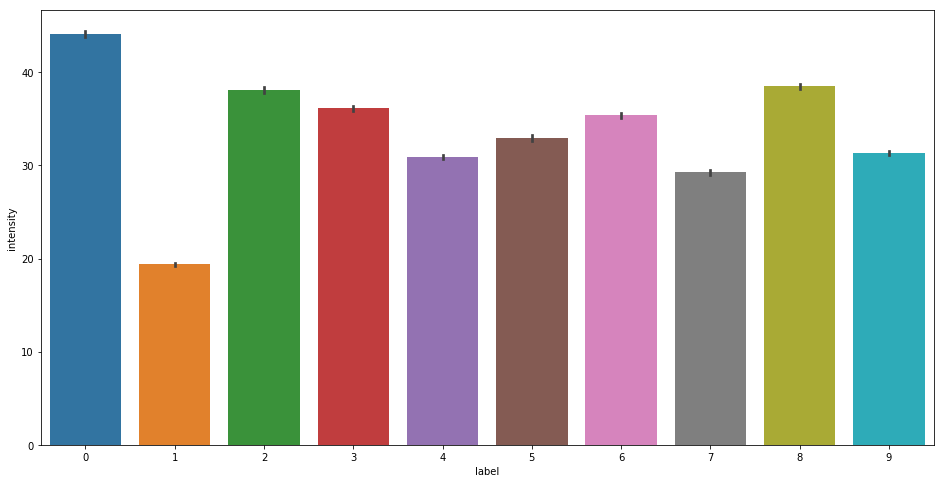

In [14]:
# plotting intensity versus digits

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='intensity', 
            data=digits, 
            order=order)

### Data Preparation
#### Let's conduct some data preparation steps before modeling. Scaling the features, extracting X and Y and performing test - train split.

In [15]:
# splitting into X and y
X = digits.drop("label", axis = 1)
y = digits['label']

In [16]:
# scaling the features
X_scaled = scale(X)

# sub spliting train data
mnist_Xtrain , mnist_Xtest , mnist_ytrain, mnist_ytest= train_test_split(X_scaled, y, test_size = 0.80, random_state = 42)

In [17]:
print(mnist_Xtrain.shape)

(8400, 785)


In [18]:
# sub spliting train data
X_train, X_test, y_train, y_test = train_test_split(mnist_Xtrain, mnist_ytrain, test_size = 0.3, random_state = 42)

In [19]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,-0.183056
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,-0.887619
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,-0.386415
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,-0.973820
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0,0.106733


In [20]:
print(X_train.shape)

(5880, 785)


In [21]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9027777777777778 

[[228   0   2   0   1   1   1   0   1   0]
 [  0 288   0   0   2   0   2   0   4   0]
 [  5   4 223   4   8   1   1   3   2   2]
 [  1   1   8 233   2  10   1   3   3   1]
 [  1   1   3   0 232   0   1   0   0  13]
 [  5   1   2   8   5 199   3   1   6   2]
 [  2   1   2   1   3   2 244   0   0   0]
 [  0   2   1   3   5   0   0 233   0  12]
 [  2  12   4   6   1   8   2   5 194   4]
 [  2   1   0   5  20   0   1  11   1 201]]


In [23]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [24]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9281746031746032 

[[226   0   1   0   0   1   2   1   3   0]
 [  0 288   0   1   2   1   2   1   1   0]
 [  2   1 232   5   6   1   1   4   1   0]
 [  0   2   8 237   0   8   1   5   1   1]
 [  0   1   3   0 236   0   3   2   0   6]
 [  2   0   3   3   1 212   2   4   1   4]
 [  2   0   0   0   1   2 245   5   0   0]
 [  0   5   1   1   3   0   0 235   0  11]
 [  2   7   0   3   1   4   2   4 213   2]
 [  1   1   2   4   6   1   0  11   1 215]]


In [25]:
# polynomial model
# using poly kernel, C=1, default value of gamma

# model
poly_model = SVC(kernel='poly')

# fit
poly_model.fit(X_train, y_train)

# predict
y_pred = poly_model.predict(X_test)

In [26]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8253968253968254 

[[187   0   0   0   1   2   2   0  42   0]
 [  0 287   0   0   1   0   1   0   6   1]
 [  0   1 166   4   7   0   0   1  72   2]
 [  0   2   1 199   0   5   1   2  49   4]
 [  0   1   1   0 220   0   2   0   2  25]
 [  0   0   0   3   1 163   1   0  57   7]
 [  0   1   0   0   8   3 226   0  17   0]
 [  0   6   0   1   5   0   0 188  12  44]
 [  0   4   0   2   1   2   0   2 223   4]
 [  0   0   1   3   9   1   0   3   4 221]]


#### Out of all 3 kernels, rbf is performing far better than other two, so tuning the hyperparameters for rbf kernel.

In [27]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 36.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,179.192844,8.790829,20.557322,1.000052,1,0.01,"{'C': 1, 'gamma': 0.01}",0.690476,0.732993,0.766156,...,0.737415,0.025721,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,45.060724,1.131285,14.192131,1.072722,1,0.001,"{'C': 1, 'gamma': 0.001}",0.907313,0.936224,0.946429,...,0.928741,0.012923,4,0.974915,0.975765,0.973002,0.974490,0.974915,0.974617,0.000908
2,67.163303,4.263745,18.984170,2.426394,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.881803,0.909864,0.909864,...,0.900510,0.010261,8,0.921556,0.918155,0.914753,0.919218,0.918793,0.918495,0.002195
3,165.104921,5.067134,18.733770,1.209977,10,0.01,"{'C': 10, 'gamma': 0.01}",0.704082,0.748299,0.784864,...,0.752891,0.027043,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,36.304893,1.503332,10.333313,0.385276,10,0.001,"{'C': 10, 'gamma': 0.001}",0.920068,0.943878,0.952381,...,0.936735,0.011212,3,0.999362,0.999575,0.999362,0.999575,0.999787,0.999532,0.000159
5,25.977280,0.445930,8.975108,0.553057,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.909864,0.929422,0.943027,...,0.926020,0.010716,5,0.965986,0.963861,0.963861,0.967262,0.965349,0.965264,0.001301
6,144.963214,1.328739,17.078752,0.345532,100,0.01,"{'C': 100, 'gamma': 0.01}",0.704082,0.748299,0.784864,...,0.752891,0.027043,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,33.978669,0.991173,9.280516,0.639213,100,0.001,"{'C': 100, 'gamma': 0.001}",0.919218,0.944728,0.951531,...,0.937075,0.011307,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,20.583837,0.904170,7.623525,0.597586,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.905612,0.926020,0.939626,...,0.922789,0.011053,6,0.997024,0.997024,0.997236,0.996386,0.997874,0.997109,0.000477
9,153.665366,2.708133,18.590310,1.652641,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.704082,0.748299,0.784864,...,0.752891,0.027043,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


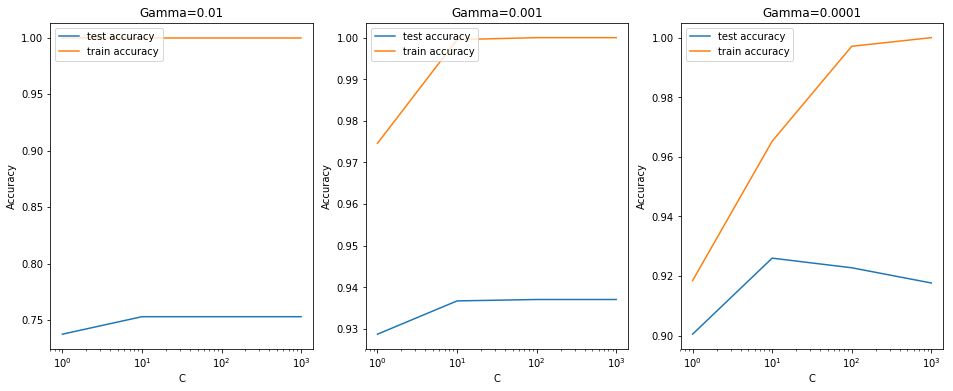

In [29]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9370748299319728 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


#### Building and Evaluating the Final Model
Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9361111111111111 

[[229   0   1   0   0   1   1   1   1   0]
 [  0 289   1   0   2   0   1   1   2   0]
 [  4   1 231   4   7   0   0   4   1   1]
 [  1   1   6 246   0   4   1   3   1   0]
 [  0   1   1   0 238   0   3   1   0   7]
 [  1   1   3   4   0 214   1   4   2   2]
 [  3   0   0   0   1   2 245   4   0   0]
 [  1   2   1   3   4   0   0 236   0   9]
 [  3   3   0   3   3   4   0   4 216   2]
 [  1   2   1   4   6   1   1  11   0 215]] 



### So now we can conclude -
#### The accuracy achieved using a non-linear kernel (~0.94) is higher than that of a linear one (~0.9).
#### The " rbf " kernel plays a good role with c = 100 and gamma = 0.001. 

In [32]:
test = pd.read_csv("test.csv")

In [33]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# checking for nulls

test.isnull().values.any()

False

In [35]:
# fetching new feature intensity..

test['intensity'] = test.mean(axis=1)

In [36]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,intensity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.260204
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50.934949
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18.966837
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20.673469
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30.987245


In [37]:
# scaling the features
test_scaled = scale(test)

In [38]:
test_pred = model.predict(test_scaled)

In [41]:
df = pd.DataFrame(test_pred)

In [42]:
df.head()

,0
0,2
1,0
2,9
3,4
4,3


In [49]:
df.columns = ['nm']

In [50]:
df.head()

,nm
0,2
1,0
2,9
3,4
4,3


In [54]:
fdf = pd.DataFrame({'ImageId' : df.index + 1, 'label' : df.nm})

In [55]:
fdf.head()

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [56]:
fdf.to_csv("C:/Users/vjain83/Downloads/DS Learn/Linear Regression/submission.csv")